In [52]:
%matplotlib inline
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('../test_images/test5.jpg')

(720, 1280, 3)

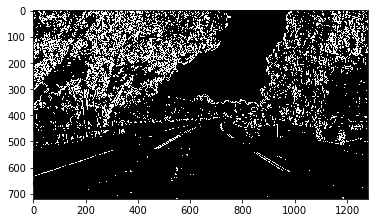

In [46]:
img = np.copy(image)
color_threshold=(170,255)
gradient_threshold=(20,100)
# Convert to HSV color space and separate the V channel
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
s_channel = hsv[:,:,1]
v_channel = hsv[:,:,2]

# Sobel x
sobelx = cv2.Sobel(v_channel, cv2.CV_64F, 1, 0, ksize=5) # Take the derivative in x
sobely = cv2.Sobel(v_channel, cv2.CV_64F, 0, 1, ksize=5)
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
gradient_binary = np.zeros_like(scaled_sobel)
gradient_binary[(scaled_sobel >= gradient_threshold[0]) & (scaled_sobel <= gradient_threshold[1])] = 1
plt.imshow(gradient_binary,cmap='gray')

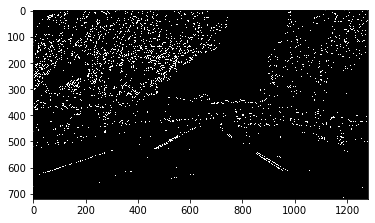

In [47]:
#  Take the absolute value of the x and y gradients
abs_sobelx = np.absolute(sobelx)
abs_sobely = np.absolute(sobely)

# Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
gradient_direction = np.arctan2(abs_sobely, abs_sobelx)
dir_binary = np.zeros_like(gradient_direction)
dir_binary[(gradient_direction > 0.7) & (gradient_direction < 1.3)] = 1

combined_sobelx_direction = np.zeros_like(dir_binary)
combined_sobelx_direction[(gradient_binary == 1) &  (dir_binary == 1)] = 1
plt.imshow(combined_sobelx_direction, cmap='gray')


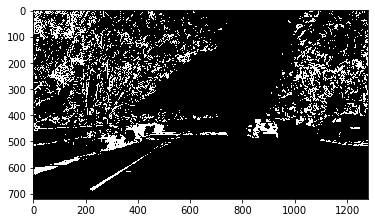

In [48]:
# Threshold color channel
color_binary = np.zeros_like(s_channel)
color_binary[(s_channel >= color_threshold[0]) & (s_channel <= color_threshold[1])] = 1
plt.imshow(color_binary,cmap='gray')

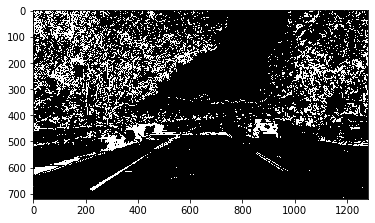

In [50]:
# Combine color and gradient binary images
combined_binary = np.zeros_like(gradient_binary)
#combined_binary[(gradient_binary==1) | (color_binary==1)] = 1
combined_binary[(combined_sobelx_direction==1) | (color_binary==1)] = 1
plt.imshow(combined_binary,cmap='gray')

In [51]:
combined_binary.shape

(720, 1280)